In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

In [5]:
pwd

'/Users/nayansubba/Desktop/cifar10'

In [7]:
datadict = unpickle('cifar_data/cifar-10-batches-py/test_batch')

In [8]:
X = datadict['data']
Y = datadict['labels']
print(np.shape(X), np.shape(Y))

(10000, 3072) (10000,)


In [9]:
labeldict = unpickle('cifar_data/cifar-10-batches-py/batches.meta')
label_names = labeldict['label_names']
print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
#test_data = X.reshape(10000,3,32,32).transpose(0,2,3,1)#.astype('uint8')
test_data = np.array(X)
test_labels = np.array(Y)
print(test_data.shape, test_labels.shape)

(10000, 3072) (10000,)


In [12]:
data, labels = [],[]
for i in range(1,6):
    filename = 'cifar_data/cifar-10-batches-py/data_batch_'+str(i)
    open_data = unpickle(filename)
    if len(data)>0:
        data = np.vstack((data, open_data['data']))
        labels = np.hstack((labels, open_data['labels']))
    else:
        data = open_data['data']
        labels = open_data['labels']
#train_data = data.reshape(50000,3,32,32).transpose(0,2,3,1)
train_data = np.array(data)
train_labels = np.array(labels)
print(train_data.shape, train_labels.shape)
print(train_data.dtype)

(50000, 3072) (50000,)
uint8


In [13]:
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

print(train_labels.shape, test_labels.shape)
print(train_labels.dtype, test_labels.dtype)

(50000, 10) (10000, 10)
float32 float32


In [14]:
train_data = train_data.astype('float32')
train_data = train_data/255.0

test_data = test_data.astype('float32')
test_data = test_data/255.0

print(train_data.shape, test_data.shape)
print(train_data.dtype, test_data.dtype)

(50000, 3072) (10000, 3072)
float32 float32


### ONE LAYER BASELINE NEURAL NETWORK

In [15]:
model = Sequential()

In [16]:
model.add(Dense(5, input_dim=3072, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [17]:
keras.optimizers.SGD(lr=0.01)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 171us/sample - loss: 2.2091 - accuracy: 0.1514 - val_loss: 2.1132 - val_accuracy: 0.1882
Epoch 2/10
50000/50000 [==============================] - 8s 160us/sample - loss: 2.0531 - accuracy: 0.2172 - val_loss: 2.0269 - val_accuracy: 0.2290
Epoch 3/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.9769 - accuracy: 0.2448 - val_loss: 1.9536 - val_accuracy: 0.2583
Epoch 4/10
50000/50000 [==============================] - 7s 146us/sample - loss: 1.9482 - accuracy: 0.2573 - val_loss: 1.9313 - val_accuracy: 0.2667
Epoch 5/10
50000/50000 [==============================] - 7s 146us/sample - loss: 1.9345 - accuracy: 0.2674 - val_loss: 1.9189 - val_accuracy: 0.2690
Epoch 6/10
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9237 - accuracy: 0.2730 - val_loss: 1.9095 - val_accuracy: 0.2835
Epoch 7/10
50000/50000 [==========================

In [19]:
train_data = data.reshape(50000,3,32,32).transpose(0,2,3,1)
test_data = X.reshape(10000,3,32,32).transpose(0,2,3,1)

In [20]:
train_data = train_data.astype('float32')
train_data = train_data/255.0

test_data = test_data.astype('float32')
test_data = test_data/255.0

### FULLY CONNECTED CNN
VARIATION OF DROPOUT REGULARIZATION, INCREASING DROPOUT FROM 0.2 TO 0.3,0.4 AND 0.5. I FIND THIS METHOD EFFECTIVE FOR INCREASING ACCURACY. ALSO I ADDED BATCH NORMALIZATION, I THINK IT IS GOOD SOLUTION.


In [21]:
def define_cnnModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    
    optimizer = SGD(lr=0.01) 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model = define_cnnModel()

In [23]:
history = model.fit(train_data, train_labels, epochs=60, validation_data=(test_data, test_labels), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 343s 7ms/sample - loss: 1.9184 - accuracy: 0.3016 - val_loss: 1.6956 - val_accuracy: 0.3872
Epoch 2/60
50000/50000 [==============================] - 324s 6ms/sample - loss: 1.7295 - accuracy: 0.3690 - val_loss: 1.6299 - val_accuracy: 0.4175
Epoch 3/60
50000/50000 [==============================] - 323s 6ms/sample - loss: 1.6412 - accuracy: 0.4002 - val_loss: 1.5331 - val_accuracy: 0.4460
Epoch 4/60
50000/50000 [==============================] - 330s 7ms/sample - loss: 1.5568 - accuracy: 0.4290 - val_loss: 1.5009 - val_accuracy: 0.4535
Epoch 5/60
50000/50000 [==============================] - 316s 6ms/sample - loss: 1.4768 - accuracy: 0.4573 - val_loss: 1.4172 - val_accuracy: 0.4681
Epoch 6/60
50000/50000 [==============================] - 319s 6ms/sample - loss: 1.3830 - accuracy: 0.4889 - val_loss: 1.3318 - val_accuracy: 0.4932
Epoch 7/60
50000/50000 [==========================

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

In [25]:
acc = model.evaluate(test_data, test_labels,  verbose=0)
print(acc)

[0.47285093541145323, 0.8445]


<AxesSubplot:>

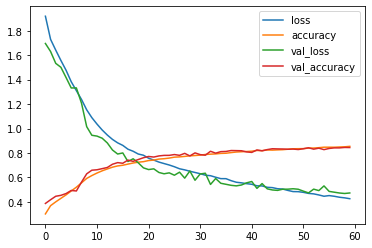

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Text(0, 0.5, 'Accuracy')

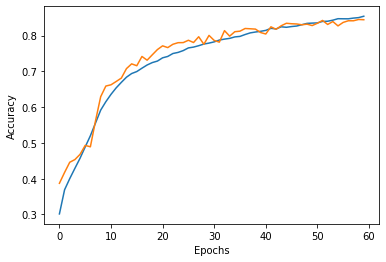

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')